# ARIMA Model

In [1]:
import pandas as pd 
from sklearn.model_selection  import train_test_split
import numpy as np 
import matplotlib.pyplot as plt
from pandas import DataFrame

from sklearn.metrics import mean_squared_error
from math import sqrt
from pmdarima import auto_arima
from pandas.plotting import lag_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error ,r2_score 
from statsmodels.tools.eval_measures import rmse

# Load and PreProcess 

In [2]:
data = pd.read_csv('data/PMS_data.csv',nrows=100000)

In [3]:
data.head()

,Flow,Occupy,Speed
0,133.0,0.0603,65.8
1,210.0,0.0589,69.6
2,124.0,0.0358,65.8
3,145.0,0.0416,69.6
4,206.0,0.0493,69.4


In [4]:
ratio = 0.75
  
total_rows = data.shape[0]
train_size = int(total_rows*ratio)
train_set = data[0:train_size]
test_set = data[train_size:]

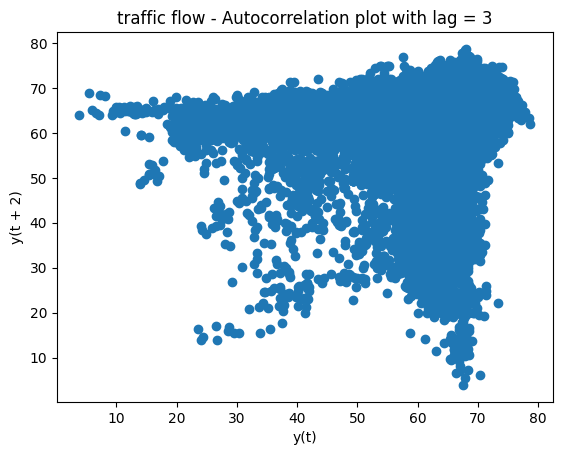

In [5]:
plt.figure()
lag_plot(data['Speed'], lag=2)
plt.title('traffic flow - Autocorrelation plot with lag = 3')
plt.show()

In [6]:
print(len(train_set))
print(len(test_set))

75000
25000


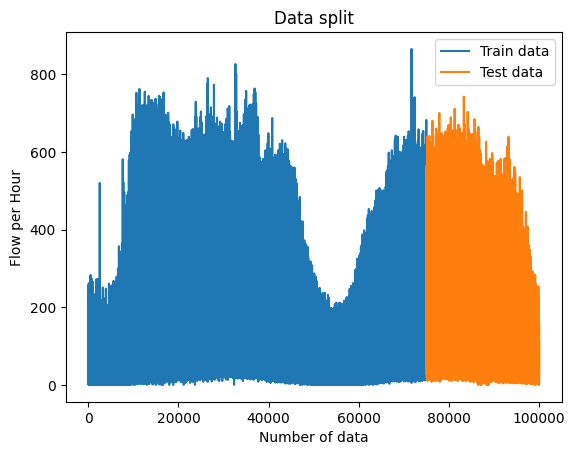

In [7]:
plt.plot(train_set['Flow'].index,train_set['Flow'].values,label="Train data")
plt.plot(test_set['Flow'].index, test_set['Flow'].values,label="Test data")
plt.title('Data split')
plt.xlabel('Number of data')
plt.ylabel('Flow per Hour')
plt.legend()
plt.savefig("traintestdata.png")

# Train ARIMA 

In [8]:
xtrain = train_set['Flow'].values
xtest = test_set['Flow'].values

In [9]:
data_set = data['Flow']
data_set.head()

0    133.0
1    210.0
2    124.0
3    145.0
4    206.0
Name: Flow, dtype: float64

In [10]:
from IPython.display import clear_output

In [12]:
#auto_arima(xtrain, start_p=1, start_q=1,test='adf',max_p=5, max_q=5,m=1,d=1,seasonal=False, start_P=0, D=None, trace=True, error_action='ignore',  suppress_warnings=True, stepwise=True)

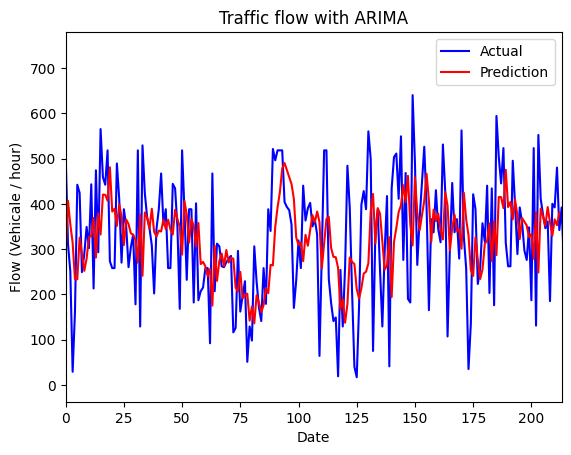

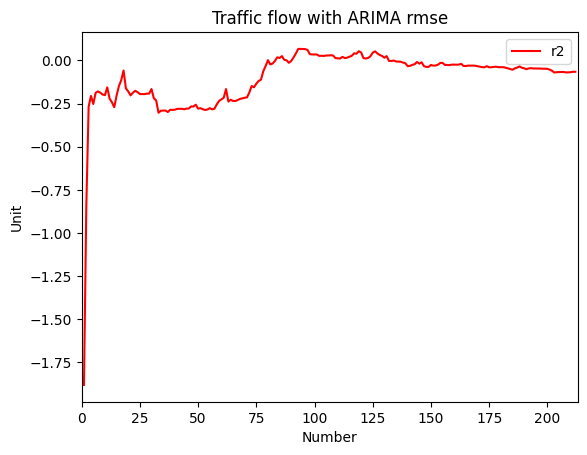

In [ ]:

history = xtrain.tolist()
predictions = list()
r2 = list()
rmse = list()
for t in range(len(xtest)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = xtest[t]
    history.append(obs)
    #print((t/len(xtest))*100)
    plt.plot(xtest,color = 'blue',label = "Actual")
    plt.plot(predictions, color='red', label = "Prediction")
    plt.xlabel('Date')
    plt.ylabel("Flow (Vehicale / hour)")
    plt.title('Traffic flow with ARIMA')
    plt.xlim(0,len(predictions))
    #plt.xticks(np.arange(0,2500,250), test_set.day[0:2500:250], rotation = 45)
    plt.legend()
    plt.show()
    #plt.savefig('total_actual_real.png')
    rmse.append(sqrt(mean_squared_error(xtest[:len(predictions)], predictions)))
    r2.append(r2_score(xtest[:len(predictions)], predictions))
    #plt.plot(rmse,color = 'blue',label = "rmse")
    plt.plot(r2,color = 'red',label = "r2")
    plt.xlabel('Number')
    plt.ylabel("Unit")
    plt.title('Traffic flow with ARIMA rmse')
    plt.xlim(0,len(predictions))
    #plt.xticks(np.arange(0,2500,250), test_set.day[0:2500:250], rotation = 45)
    plt.legend()
    #plt.savefig('total_actual_real.png')
    plt.show()
    clear_output(wait=True)



In [ ]:
rmse = sqrt(mean_squared_error(xtest, predictions))
rmse

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(xtest,label = "Test")
plt.plot(predictions, label = "Prediction")
plt.ylabel("Flow (Vehicale / hour)")
plt.title('Traffic flow with ARIMA')
plt.legend()
#plt.savefig('Actual_real.png')
plt.show()

In [ ]:
plt.plot(xtest,color = 'blue',label = "Actual")
plt.plot(predictions, color='red', label = "Prediction")
plt.xlabel('Date')
plt.ylabel("Flow (Vehicale / hour)")
plt.title('Traffic flow with ARIMA')
plt.xlim(0,2500)
plt.xticks(np.arange(0,2500,250), test_set.day[0:2500:250], rotation = 45)
plt.legend()
plt.savefig('total_actual_real.png')
plt.show()

In [ ]:

errors = list()
for i in range(len(xtest)):
 # calculate error
 err = (xtest[i] - predictions[i])**2
 # store error
 errors.append(err)
 # report error
# plot errors
plt.plot(errors)
plt.title('Mean Square error ')
plt.xlabel('Predicted Value')
plt.ylabel('Mean Squared Error')
plt.savefig('MSE.png')
plt.show()

In [ ]:
r2 = r2_score(xtest, predictions)
rmse = sqrt(mean_squared_error(xtest, predictions))
print('RMSE', rmse, 'R_2', r2)

In [ ]:
residuals = DataFrame(model_fit.resid) 
residuals.plot()
plt.show()

In [ ]:
#we continue to check residuals
residuals.plot(kind='kde') 
plt.show()